In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import math
import random

In [3]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['bias'] = 1
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,bias,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1,36.2


<div dir='ltr'>

# ***Look for missing data***
</div>


In [4]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
bias       0
MEDV       0
dtype: int64

<div dir='ltr'>

# ***Splitting train and test data***

</div>


\begin{equation}
X = \begin{pmatrix} X & bias \end{pmatrix}
\end{equation}

In [7]:
def find_train_test(df):
    train = df.sample(frac=0.8, random_state=0)
    test = df.drop(train.index)
    x_train = train.loc[:, 'CRIM':'bias']
    y_train = train['MEDV']
    x_test = test.loc[:, 'CRIM':'bias']
    y_test = test['MEDV']
    return x_train, x_test, y_train, y_test


X_train, X_test, y_train, y_test = find_train_test(boston)
print("Train data:\n", X_train.shape, y_train.shape)
print("Test data:\n", X_test.shape, y_test.shape)

Train data:
 (405, 14) (405,)
Test data:
 (101, 14) (101,)


# ***Plot y based on x features***

## histogram and density

<div dir="rtl">
    در ابتدا یک histogram از yها می‌کشیم تا توزیع کلی آن‌ها را متوجه شویم.
</div>

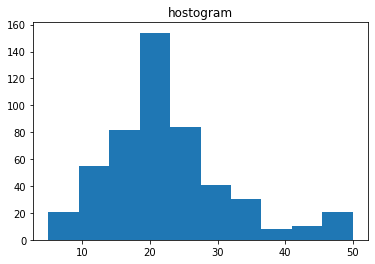

<AxesSubplot:title={'center':'density plot'}, ylabel='Density'>

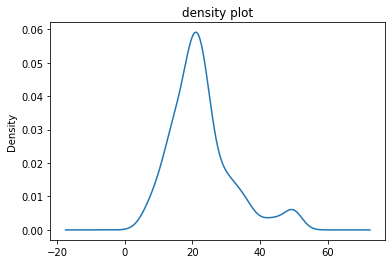

In [8]:
plt.hist(y)
plt.title('hostogram')
plt.show()
y.plot(kind='density', title='density plot')

## Plots

<div dir="rtl">
    ابتدا برای بهتر متوجه شدن corr بین MEDV و سایر ویژگی‌ها یک hitmap می‌کشیم. همانطور که مشخص است ویژگی‌هایی مانند LSTAT و PTRATIO رابطه بیشتری با MEDV دارند.
    سپس ویژگی‌هایی که corr بیشتری دارند را در نمواری جداگانه رسم می‌کنیم.
</div>

<AxesSubplot:>

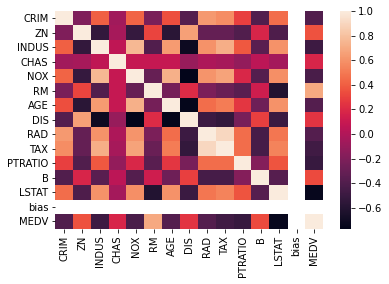

In [8]:
import seaborn as sns
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix)

<AxesSubplot:xlabel='PTRATIO', ylabel='MEDV'>

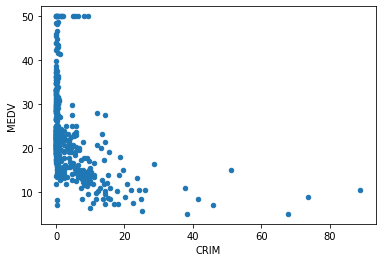

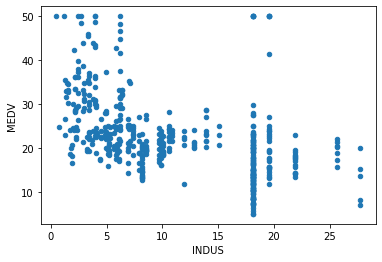

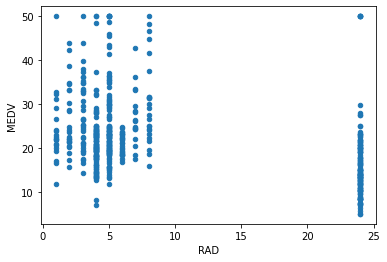

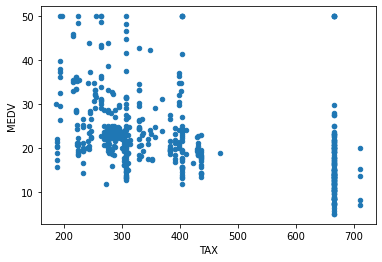

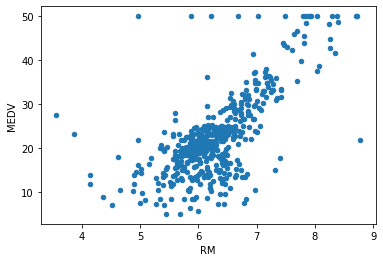

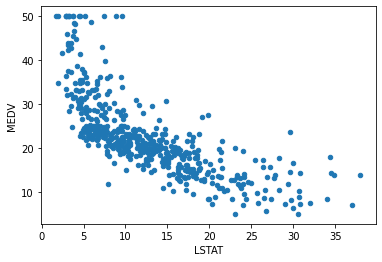

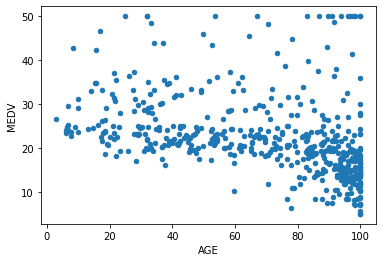

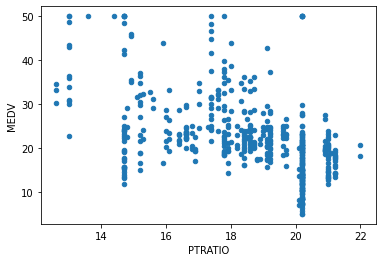

In [21]:
boston.plot.scatter('CRIM', 'MEDV')
boston.plot.scatter('INDUS', 'MEDV')
boston.plot.scatter('RAD', 'MEDV')
boston.plot.scatter('TAX', 'MEDV')
boston.plot.scatter('RM', 'MEDV')
boston.plot.scatter('LSTAT', 'MEDV')
boston.plot.scatter('AGE', 'MEDV')
boston.plot.scatter('PTRATIO', 'MEDV')

# ***Linear regression***

## Implementation

## My implementation with optimal w closed form

\begin{align*}
& W = (X^TX)^{-1}X^Ty
\end{align*}

In [9]:
def find_optimal_w(X, y):
    a = np.dot(X.T, X)
    b = np.dot(X.T, y)
    w = np.dot(np.linalg.inv(a), b)
    return w

w = find_optimal_w(X_train.values, y_train.values)
print("w = ", w)

w =  [-1.10692432e-01  4.15728696e-02  1.06191156e-02  1.93303479e+00
 -1.78348005e+01  3.28769146e+00  4.42328360e-03 -1.38519803e+00
  3.67364498e-01 -1.53962307e-02 -8.93236753e-01  8.76540340e-03
 -5.52746768e-01  3.95314740e+01]


## Predict

\begin{align*}
& y_{predict} = wX^T\\
\end{align*}

Train:


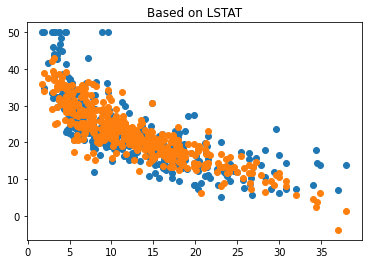

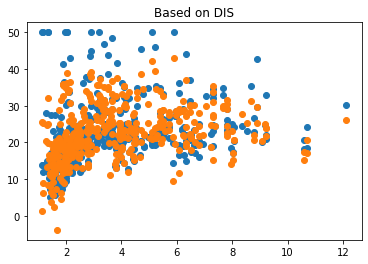

In [28]:
def predict(w, X_test, y_test):
    y_predict = np.dot(w, X_test.T)
    return y_predict

def mean_square_error(y, y_predict):
    return np.square(np.subtract(y, y_predict)).mean() 

y_predict_train = predict(w, X_train.values, y_train.values)

print("Train:")
plt.scatter(X_train['LSTAT'], y_train)
plt.scatter(X_train['LSTAT'], y_predict_train)
plt.title("Based on LSTAT")
plt.show()

plt.scatter(X_train['DIS'], y_train)
plt.scatter(X_train['DIS'], y_predict_train)
plt.title("Based on DIS")
plt.show()

Test:


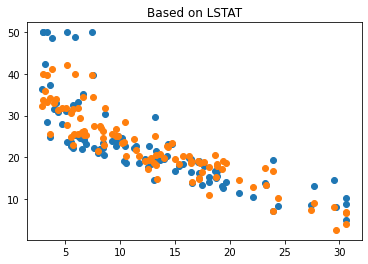

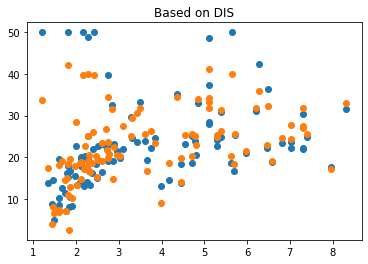

In [29]:
y_predict = predict(w, X_test.values, y_test.values)

print("Test:")
plt.scatter(X_test['LSTAT'], y_test)
plt.scatter(X_test['LSTAT'], y_predict)
plt.title("Based on LSTAT")
plt.show()

plt.scatter(X_test['DIS'], y_test)
plt.scatter(X_test['DIS'], y_predict)
plt.title("Based on DIS")
plt.show()

\begin{equation}
X_{new} = 
\begin{pmatrix}
X_{train} & bias & X^2_{train}
\end{pmatrix}
\end{equation}

In [23]:
X_train_new = np.concatenate((X_train.values, np.square(X_train.loc[:, 'CRIM':'LSTAT'].values)), axis=1)
new_w = find_optimal_w(X_train_new, y_train)
print("w with squares = ", new_w)

w with squares =  [ 9.50126201e-01 -3.43952142e-01 -6.27403451e-01 -7.24193989e+03
 -1.94867353e+01 -1.74124503e+01 -3.77496591e-02 -2.69158032e+00
  6.85442783e-01 -4.53181498e-02 -4.99847285e+00  3.42484655e-02
 -1.39496611e+00  1.57358836e+02  2.94381878e-03  7.10179621e-04
  5.03386709e-03  7.27963361e+03 -3.81319132e+00  1.57685234e+00
  3.34693221e-04  1.46831502e-01 -1.71334006e-02  4.42021133e-05
  1.18873264e-01 -6.40111347e-05  2.46271708e-02]


Train: 


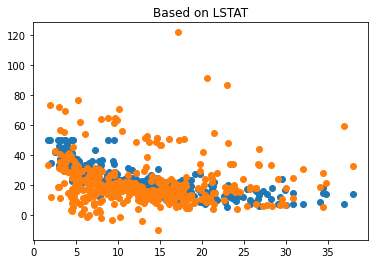

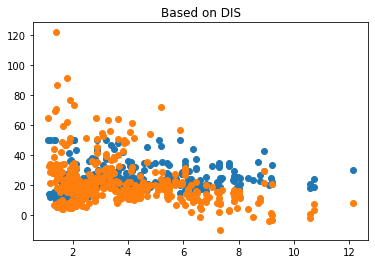

In [30]:
y_predict_new_train = predict(new_w, X_train_new, y_train.values)

print("Train: ")
plt.scatter(X_train['LSTAT'], y_train)
plt.scatter(X_train['LSTAT'], y_predict_new_train)
plt.title("Based on LSTAT")
plt.show()

plt.scatter(X_train['DIS'], y_train)
plt.scatter(X_train['DIS'], y_predict_new_train)
plt.title("Based on DIS")
plt.show()

Test:


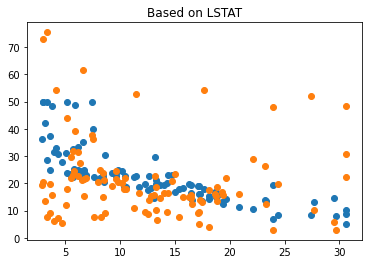

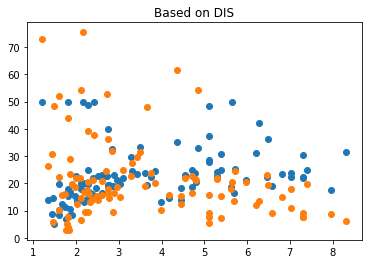

In [31]:
X_test_new = np.concatenate((X_test.values, np.square(X_test.loc[:, 'CRIM':'LSTAT'].values)), axis=1)
y_predict_new = predict(new_w, X_test_new, y_test.values)

print("Test:")
plt.scatter(X_test['LSTAT'], y_test)
plt.scatter(X_test['LSTAT'], y_predict_new)
plt.title("Based on LSTAT")
plt.show()

plt.scatter(X_test['DIS'], y_test)
plt.scatter(X_test['DIS'], y_predict_new)
plt.title("Based on DIS")
plt.show()

# Basis function

\begin{equation}
X_{basis} =
\begin{pmatrix}
X_{train} & basis & \phi_{X_train}
\end{pmatrix}
\end{equation}

In [25]:
def basis_func(x, mu_j, s):
    return math.exp(-1*np.linalg.norm(x-mu_j)**2/(2*s**2))


def find_random_mu(X_train):
    mu_i = []
    for i in range(10):
        mu_i.append(X_train[random.randint(0, X_train.shape[0]), :])
    return mu_i


def find_fi(X_train, mu_i):
    fi = np.zeros((X_train.shape[0], 10))
    for x in range(X_train.shape[0]):
        for i in range(10):
            fi[x, i] = basis_func(X_train[x], mu_i[i], 1)
    return fi


mu_i = find_random_mu(X_train.values)
fi = find_fi(X_train.values, mu_i)
X_train_new_basis = np.concatenate((X_train, fi), axis=1)
w_basis = find_optimal_w(X_train_new_basis, y_train)
w_basis

array([-1.11117738e-01,  4.02135241e-02, -7.97404256e-03,  1.01837332e+00,
       -1.69100924e+01,  3.50302592e+00,  2.33136612e-03, -1.34634888e+00,
        3.80926153e-01, -1.63944348e-02, -8.65695987e-01,  9.06347165e-03,
       -5.12923440e-01,  3.70896178e+01, -2.69719166e+00, -5.80484406e+00,
       -5.71833092e+00,  3.17046942e+00, -1.14692288e+01,  2.56478714e+01,
       -4.55733568e+00,  1.45891743e+01, -5.06055855e-01, -3.24136652e+00])

Train:


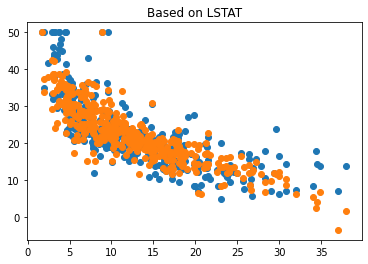

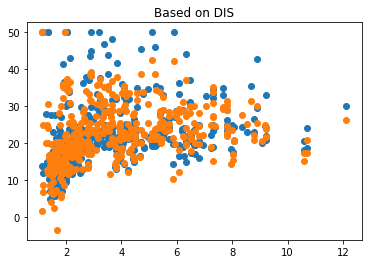

In [32]:
y_predict_basis_train = predict(w_basis, X_train_new_basis, y_train.values)

print("Train:")
plt.scatter(X_train['LSTAT'], y_train)
plt.scatter(X_train['LSTAT'], y_predict_basis_train)
plt.title("Based on LSTAT")
plt.show()

plt.scatter(X_train['DIS'], y_train)
plt.scatter(X_train['DIS'], y_predict_basis_train)
plt.title("Based on DIS")
plt.show()

Test:


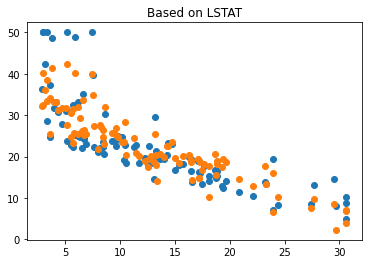

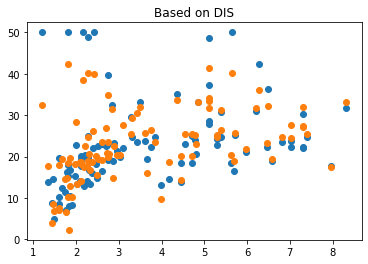

In [33]:
fi_test = find_fi(X_test.values, mu_i)
X_test_new_basis = np.concatenate((X_test, fi_test), axis=1)
y_predict_basis = predict(w_basis, X_test_new_basis, y_test.values)

print("Test:")
plt.scatter(X_test['LSTAT'], y_test)
plt.scatter(X_test['LSTAT'], y_predict_basis)
plt.title("Based on LSTAT")
plt.show()

plt.scatter(X_test['DIS'], y_test)
plt.scatter(X_test['DIS'], y_predict_basis)
plt.title("Based on DIS")
plt.show()

# MSE

In [27]:
print("MSE for simple linear regression -> \n ", "test:", mean_square_error(y_test.values, y_predict)
      , "train:", mean_square_error(y_train.values, y_predict_train))
print("MSE for linear regression with square of features -> \n ", 
      "test:", mean_square_error(y_test.values, y_predict_new),
      "train:", mean_square_error(y_train.values, y_predict_new_train))
print("MSE for linear regression with basis function -> \n ",
      "test:", mean_square_error(y_test.values, y_predict_basis), 
      "train:", mean_square_error(y_train.values, y_predict_basis_train))

MSE for simple linear regression -> 
  test: 16.5736903923155 train: 23.51326388366808
MSE for linear regression with square of features -> 
  test: 199.56867136981614 train: 252.17400246748707
MSE for linear regression with basis function -> 
  test: 17.298214227952815 train: 20.855220349541682


<div dir="rtl">
    همانطور که دیدیم خطای مدل اول که یک linear regressor ساده با bias بود روی داده‌های train حدود ۲۳.۵ و روی داده‌های test حدود ۱۶.۶ است. خطای مدل دوم که در آن مجذور ویژگی‌ها نیز به ماتریس ویژگی‌ها اضافه شده است روی داده‌ّای train ۲۵۲.۲ و روی داده‌های test ۱۹۹.۶ است که نسبت به مدل اول خیلی بیشتر است. پس می‌توان نتیجه گرفت که مدل اول  برای مدل کردن دیتاست مناسب‌تر است یا به عبارتی label با ویژگی‌ها رابطه خطی دارد نه رابطه با درجه۲. <br>
    خطای مدل سوم روی داده‌های train ۲۰.۹ و روی داده‌های test ۱۷.۳ است. خطای این مدل به مدل اول نزدیک‌تر است. دلیل این امر آن است که در صورتی که ماتریس ویژگی‌ها را چاپ کنیم می‌بینیم که از ۱۰ ویژگی اضافه شده تعداد زیادی صفر یا مقدار کوچکی هستند و wهای به دست آمده نیز مقادیر کوچکی هستند. پس به طور کلی تفاوت کمی با مدل اول خواهیم داشت. به همین دلیل نیز خطاهای آن‌ها به هم نزدیک هستند. <br>
    با توجه به خطاهای به دست آمده نتیجه می‌گیریم که مدل اول ( یک linear regressor ساده با bias ) بهترین مدل از بین ۳ مدل معرفی شده برای این dataset است.
</div>